# Série de Fourier
- Objetivo:
  - Visualizar a decomposição de um sinal em componentes senoidais
  - Relacionar os valores das componentes espectrais e a frequência associada com características do sinal
  - Observar o efeito da reconstrução do sinal com  conjunto parcial de componentes espectrais

## Importar módulos necessários

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Parâmetros da simulação

In [3]:
# O sinal é contínuo, mas é preciso discretizar para simular no computador !

L = 1000 # número de pontos do sinal a serem calculados
Tm = np.pi    # meio período do pulso retangular
x = np.linspace(-2*Tm,2*Tm,L) # vetor de amostras de tempo

## Sinal: Pulso retangular periódico
\begin{align*}
  f(x) &= \begin{cases}
            -k & -\pi< x < 0\\
            k & 0< x < \pi
          \end{cases}\\
        f(x+2\pi)&= f(x), \quad \forall x\in \mathbb R
\end{align*}

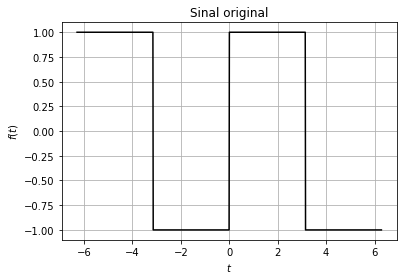

In [4]:
#Vetor com amostras do sinal original
f = np.zeros((len(x),1)) # sinal original
k = 1
for i in range(len(x)):
    if (-2*Tm <=x[i] < -Tm) or (0 <=x[i] < Tm):
        f[i] = k
    else:
        f[i] = -k


#Gráfico do sinal original
plt.figure()
plt.plot(x,f,'k' )
plt.grid(True)
plt.xlabel('$t$')
plt.ylabel('$f(t)$')
plt.title('Sinal original')
plt.show()

## Determinar vetor de coeficientes da Série de Fourier
\begin{equation*}
   f(x) = \frac{a_0}{2}+ \sum_{n=1}^\infty \left [ a_n\cos nx  + b_n\sin nx \right ]
\end{equation*}

Para o exemplo considerado
\begin{align*}
a_0 &= 0\\
a_n &= 0\\
b_n &= \begin{cases}
            \frac{4k}{n\pi} & n\text{ é ímpar}\\
            0 & n\text{ é par}
        \end{cases}
\end{align*}

Assim,
\begin{equation*}
   f(x) = \sum_{n=1}^\infty \frac{4k}{\pi(2n-1)}\sin (2n-1)x
\end{equation*}

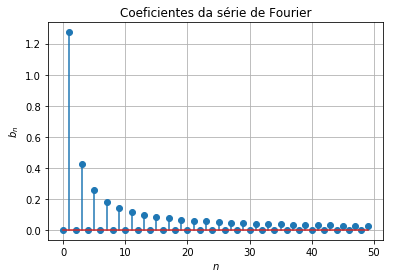

In [5]:
N = 101 # Comprimento do vetor de coeficientes. Não poderei ter um vetor infinito :-(
b = np.zeros((L,1))   # coeficentes b_n para n impar

for n in range(1,L):  # cáculo dos outros valores de a_k
    if n % 2 != 0:
        b[ n ] = 4*k / ( np.pi *n)

# Gráfico
plt.figure()
plt.stem(b[:50],use_line_collection=True)
plt.grid(True)
plt.xlabel('$n$')
plt.ylabel('$b_n$')
plt.title('Coeficientes da série de Fourier')  
plt.show()


## Reconstrução

Aproximação de $f$ por truncamento da série de Fourier:
\begin{equation*}
   f_N(x) = \sum_{n=1}^N \frac{4k}{\pi(2n-1)}\sin (2n-1)x
\end{equation*}


In [6]:
def reconstrucao(b: np.array, N: int, x: np.array, T: float)-> np.array:
    ''' Reconstroi sinal a partir dos coeficientes da série de Fourier.
    
    Parameters
    ----------
    b: np.array
        Coeficientes da Série de Fourier

    N: int
        Limite superior do somatório na equação de síntese

    x: np.array
        Vetor com valores da variável x a ser considerado na reconstrução

    T: float
        Período do sinal

    Returns
    -------
    f_N: np.array
        Sinal reconstruído
    '''

    f_N = b[0] * np.ones(len(x))    
    if N != 0:
        for n in range(1, N+1):
            f_N += b[n] * np.sin( n * x ) 
    return f_N

- N = 0

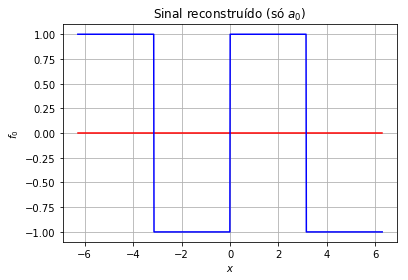

In [7]:
N = 0 # definição do valor de N

f_0 = reconstrucao(b, N, x, 2*Tm) # reconstrução truncada do sinal

# gráfico
plt.figure()
plt.plot(x,f_0,'r', x,f,'b')
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$f_0$')
plt.title('Sinal reconstruído (só $a_0$)')
plt.show()


- N = 1

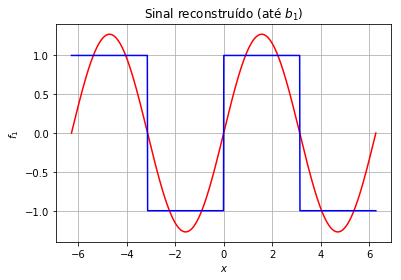

In [8]:
N = 1 # definição do valor de N

f_1 = reconstrucao(b, N, x, 2*Tm) # reconstrução truncada do sinal

# gráfico
plt.figure()
plt.plot(x,f_1,'r', x,f,'b')
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$f_1$')
plt.title('Sinal reconstruído (até $b_1$)')
plt.show()

- N = 3

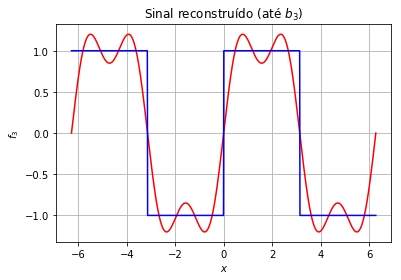

In [9]:
N = 3 # definição do valor de N

f_3 = reconstrucao(b, N, x, 2*Tm) # reconstrução truncada do sinal

# gráfico
plt.figure()
plt.plot(x,f_3,'r', x,f,'b')
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$f_3$')
plt.title('Sinal reconstruído (até $b_3$)')
plt.show()

- N = 5

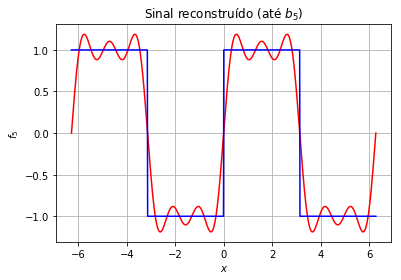

In [10]:
N = 5 # definição do valor de N

f_5 = reconstrucao(b, N, x, 2*Tm) # reconstrução truncada do sinal

# gráfico
plt.figure()
plt.plot(x,f_5,'r', x,f,'b')
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$f_5$')
plt.title('Sinal reconstruído (até $b_5$)')
plt.show()

- N = 11

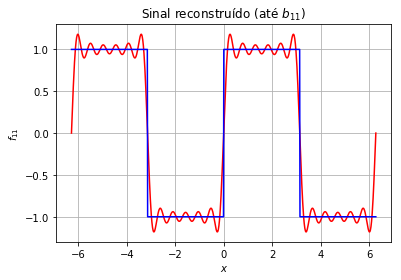

In [11]:
N = 11 # definição do valor de N

f_10 = reconstrucao(b, N, x, 2*Tm) # reconstrução truncada do sinal

# gráfico
plt.figure()
plt.plot(x,f_10,'r', x,f,'b')
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$f_{11}$')
plt.title('Sinal reconstruído (até $b_{11}$)')
plt.show()

- M = 51

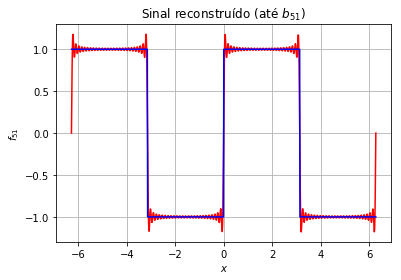

In [14]:
N = 51 # definição do valor de N

f_51 = reconstrucao(b, N, x, 2*Tm) # reconstrução truncada do sinal

# gráfico
plt.figure()
plt.plot(x,f_51,'r', x,f,'b')
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$f_{51}$')
plt.title('Sinal reconstruído (até $b_{51}$)')
plt.show()

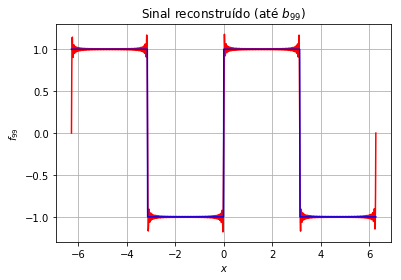

In [15]:
N = 99 # definição do valor de N

f_99 = reconstrucao(b, N, x, 2*Tm) # reconstrução truncada do sinal

# gráfico
plt.figure()
plt.plot(x,f_99,'r', x,f,'b')
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$f_{99}$')
plt.title('Sinal reconstruído (até $b_{99}$)')
plt.show()